# SVM-Klassifikation der Heise-Newsticker-Meldungen

Kontakt: christian.winkler@datanizing.com

In [1]:
# !test -f newsticker2019.db || wget https://datanizing.com/bert/heise/newsticker2019.db

In [1]:
import pandas as pd

df = pd.read_csv("newsticker-2022-2023-good-bad.csv.gz", index_col="id")

In [3]:
# Labels auf Integer wandeln
df["label"] = 0
df.loc[df["quality"] == "good", "label"] = 1
df.head()

,headline,comments,time,quality,label
id,,,,,
6233916,Zentrum für KI in der Medizin ​soll für modern...,1.0,2023-11-16 09:20:00.000000,bad,0
6266836,Bericht: Höchststand bei Anschlägen auf Geldau...,132.0,2022-12-03 17:17:00.000000,good,1
6287308,Werkstattberichte: Neues aus den Fablabs und d...,2.0,2022-01-18 10:07:00.000000,bad,0
6315231,Apple wünscht sich mehr Bluetooth-Bandbreite,109.0,2022-01-03 13:38:00.000000,good,1
6315548,HoloLens Summit: virtuelle Konferenz für Anwen...,1.0,2022-01-01 12:05:00.000000,bad,0


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.de.stop_words import STOP_WORDS as stop_words
tfidf_vectorizer = TfidfVectorizer(stop_words=list(stop_words), min_df=2, ngram_range=(1,2))
tfidf_vectors = tfidf_vectorizer.fit_transform(df["headline"])
tfidf_vectors

<13306x13086 sparse matrix of type '<class 'numpy.float64'>'
	with 85414 stored elements in Compressed Sparse Row format>

In [5]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(tfidf_vectors, df["label"].values, 
                                                      train_size=0.75, random_state=42,
                                                      stratify=df["label"].values)

In [6]:
from sklearn.svm import SVC
svm = SVC()
svc = svm.fit(X_train, y_train)

In [7]:
pred_test  = svc.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_test)

array([[ 975,  499],
       [ 269, 1584]])

<AxesSubplot:>

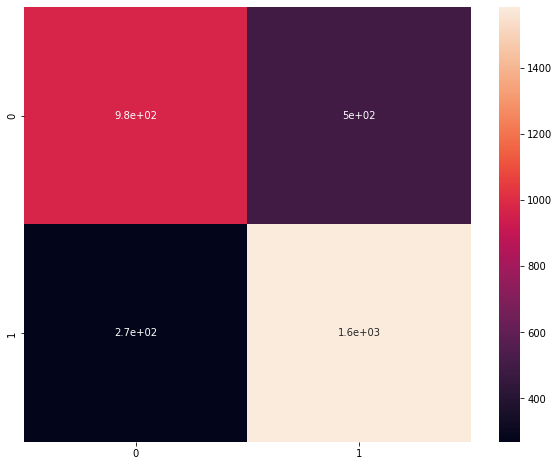

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, pred_test), annot=True)

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.78      0.66      0.72      1474
           1       0.76      0.85      0.80      1853

    accuracy                           0.77      3327
   macro avg       0.77      0.76      0.76      3327
weighted avg       0.77      0.77      0.77      3327

